<a href="https://colab.research.google.com/github/rida-manzoor/ML-Projects/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

   gene1  gene2  cancer
0    4.3    3.9       1
1    2.5    6.3       0
2    5.7    3.9       1
3    6.1    6.2       0
4    7.4    3.4       1


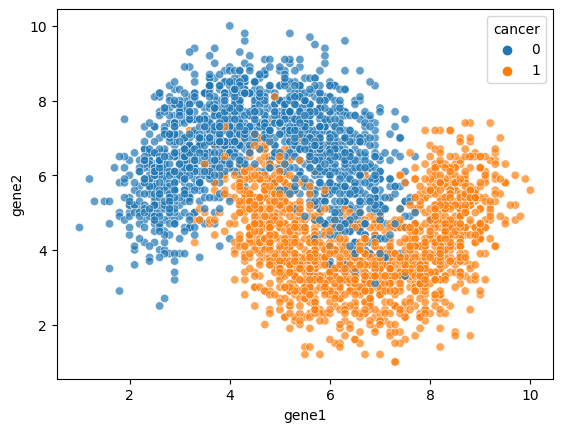

In [3]:
df = pd.read_csv('gene_expression.csv')
print(df.head())
sns.scatterplot(x='gene1',y='gene2',hue='cancer',data=df,alpha=0.7);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gene1   3000 non-null   float64
 1   gene2   3000 non-null   float64
 2   cancer  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe()

,gene1,gene2,cancer
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<Axes: xlabel='gene1', ylabel='Count'>

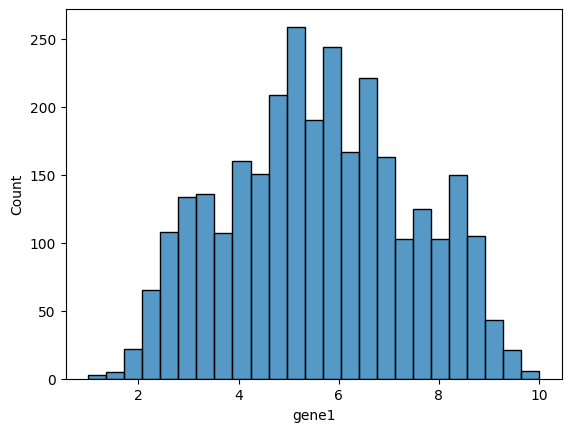

In [7]:
sns.histplot(df, x=df['gene1'])

<Axes: xlabel='gene2', ylabel='Count'>

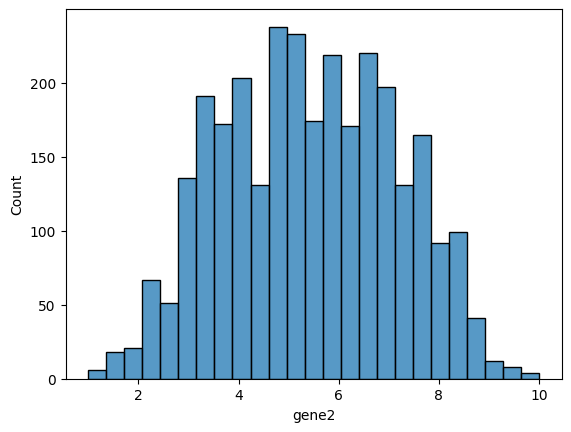

In [8]:
sns.histplot(df, x=df['gene2'])

In [9]:
df['cancer'].value_counts()

1    1500
0    1500
Name: cancer, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

x = df.drop('cancer', axis=1)
y = df['cancer']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_train), len(x_test), len(y_train), len(y_test)

(2400, 600, 2400, 600)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

model = KNeighborsClassifier(n_neighbors = 7)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[280,  20],
       [ 15, 285]])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       300
           1       0.93      0.95      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [15]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':list(range(1,20))}
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 5)

gs.fit(x_train, y_train)

print("Best Score: ", gs.best_score_)
print("Best Value of K: ", gs.best_params_)

Best Score:  0.92875
Best Value of K:  {'n_neighbors': 18}


In [21]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

In [24]:
loaded_model = joblib.load('model.pkl')

inp1 = 2.5
inp2 = 3.4

test_input = np.array([[inp1,inp2]])
print("Cancer Prediction: ", model.predict(test_input))

Cancer Prediction:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [36]:
pip install streamlit==1.13.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: streamlit
    Found existing installation: streamlit 1.27.2
    Uninstalling streamlit-1.27.2:
      Successfully uninstalled streamlit-1.27.2


In [37]:
%%writefile app.py

import streamlit as st

model = joblib.load('model.pkl')
st.title('Cancer Prediction')

inp1 = st.number_input('inp1')
inp2 = st.number_input('inp2')

new = pd.DataFrame({'inp1':inp1, 'inp2':inp2}, index=[0])

result=""
if st.button("Predict"):
  result = model.predict(new)
  st.subheader("Predicted:")
  st.subheader(result)
else:
  st.subheader("Enter inputs and click Predict button")

Overwriting app.py


In [38]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.96s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [39]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.138.24.16
npx: installed 22 in 4.804s
